# 의사결정나무(Decision Tree) 모델로 데이터 분류하기
---
대표적인 기계학습 모델인 사이킷런(scikit-learn)에서는 데이터 분류를 위한 트리 모델을 지원하고 있습니다. 트리 모델이란, 의사결정나무에 기반한 비모수적 지도 학습 방법으로 다양한 `if-else` 조건문이 마치 나무처럼 배치되어 실제 데이터의 분류 기준을 정의할 수 있도록 구성하는 방식입니다.
</p></br></br>

## 의사결정나무
---
이번에는 트리 모델 중에서 의사결정나무 모델을 이용해 보려 합니다. 의사결정나무는 트리 모델의 가장 단순한 구현으로, 해당 모델의 장단점은 아래와 같습니다. 간단히 정리하자면, 직관적이라는 장점과 과적합에 취약하다는 단점이 있지요.
</p></br></br>

**[장점]**
* 사람이 이해하기 간단하며, 모델을 시각화할 수 있습니다. 덕분에 화이트 박스 모델을 적용할 수 있습니다.
* 데이터 전처리를 거의 혹은 전혀 요구하지 않습니다.
* 모델의 복잡도는 데이터의 복잡도에 비례하기 때문에, 학습에 소요되는 자원을 예측하기 쉽습니다.
* 숫자형 및 범주형 데이터를 가리지 않습니다.

**[단점]**
* 과적합에 취약합니다.
* 입력 데이터의 차이가 조금만 나더라도 트리가 크게 달라질 수 있습니다.
* 외삽(입력 값의 범위 바깥에서 추정하는 작업)에 적합한 모델은 아닙니다.
* 최적의 의사결정나무 모델 학습은 NP-완전 문제입니다. 즉, 최적의 알고리즘이 발견되지 않은 상황입니다.
</p></br></br>

의사결정나무의 구현은 `sklearn.tree.DecisionTreeClassifier`를 이용해 구성해 볼겁니다. 학습에 이용될 데이터는 iris dataset이며, iris의 종 분류를 구현해 보도록 하겠습니다.
</p></br></br>


In [1]:
# import package
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=12345)

# DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=12345)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)

print(f'Decision Tree 정확도: {accuracy:.2%}\n')
print('Decision Tree Confusion Matrix:\n', matrix)

Decision Tree 정확도: 96.67%

Decision Tree Confusion Matrix:
 [[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]


</p></br></br>

## 의사결정나무 모델의 시각화
---
앞서 살펴본 의사결정나무 모델은 정확도 96.67%를 기록했습니다. 그런데, 해당 모델은 어떤 조건들의 집합으로 각 종들을 구분했는지 알고 싶을 수 있지요. 이 때는 `sklearn.tree.plot_tree()` 함수를 이용해서 간편하게 시각화를 진행할 수 있습니다.
</p></br></br>


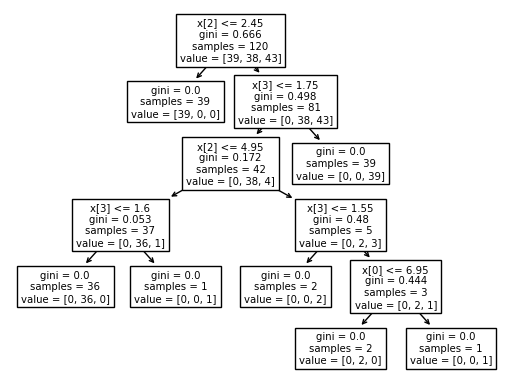

In [2]:
plot_tree(dt_clf)
plt.show()

</p></br></br>

## 특성 중요도(Feature Importance)
---
기계학습 모델의 학습이 끝났지만, 뭔가 이상한 기준으로 분류하는 대상이 관측될 경우에는 모델 자체를 조정하는 작업이나, 특징 공학(Feature Engineering)에 기반한 특성 선택(Feature Selection) 과정이 뒤따릅니다. 이번에는 후자의 방법을 이용해서 최적의 기계학습 모델을 생성해 보도록 하겠습니다. 특성 선택이란, 학습 데이터에 사용할 특성을 특성 중요도(Feature Importance)에 따라 선택하는 절차입니다. 이를 위해서 중요도를 계산해야 하는데, 사이킷런에서는 이를 손쉽게 해결할 수 있도록 `model.feature_impotances_` 라는 속성에 저장해 두도록 설계되어 있습니다.
</p></br></br>


sepal length (cm): 0.017
sepal width (cm): 0.000
petal length (cm): 0.531
petal width (cm): 0.452
--------------------------------------------------


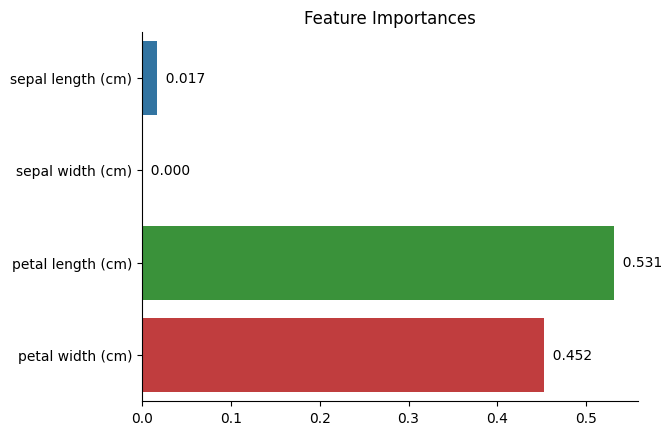

In [3]:
# feature importance 확인
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print(f'{name}: {value:.3f}')

print('-'*50)

# feature importance 시각화
ax = sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)
ax.bar_label(ax.containers[0], fmt='  %.3f')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.title('Feature Importances')
plt.show()

</p></br></br>

특성 중요도란, 각 특성이 예측에 얼마나 큰 영향을 미쳤는지를 알려주는 지표입니다. 이는 상대값이기 때문에, 얼마 이상이면 유의하다는 기준을 단순하게 정할 수 없는데요, 특성 선택을 위해서는 중요도에 따라 기계학습 모델에 입력할 데이터를 선별한 뒤 이전 모델과 비교를 해 봐야 합니다. 어떠한 특성 조합을 사용한 모델이, 정확도가 얼마나 늘어났는지 확인한 뒤 더 좋은 모델이 만들어졌다면 해당 조합을 확정하는 방식이지요.